# Bus Type Assignment in a Synthetic Grid

In this notebook, we demonstrate how to assign bus types to the nodes in the synthetically generated grid, e.g., using the Chung-Lu-Chain model, among other methods. Assigning bus types is a necessary step towards a more realistic power grid synthesization.  

There exists a **correlation between the bus types and the grid topology characteristics**, which was investigated by [Elyas et al. (2016)](https://ieeexplore.ieee.org/document/7763878). The authors also proposed a numerical measure, namely **bus type entropy**, to characterize this correlation and then a statistics-based method to search the best bus type assignments. 

## Basics

In [1]:
import sys
import os
import networkx as nx
from collections import Counter

from powergrid_synth.generator import PowerGridGenerator
from powergrid_synth.input_configurator import InputConfigurator
from powergrid_synth.bus_type_allocator import BusTypeAllocator
from powergrid_synth.visualization import GridVisualizer

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Synthetic raw topology generation

We use the previous notebook, [TopologyGeneration.ipynb](TopologyGeneration.ipynb), for this, for three voltage levels given some limited information about the node degree distributions and the transformer connection distributions.

We refer readers to that notebook for the defined python variables.

In [2]:
%run TopologyGeneration.ipynb

NotJSONError: Notebook does not appear to be JSON: '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0...

## Bus Type Assignment

In [ ]:
allocator = BusTypeAllocator(grid_graph, entropy_model=1)
# We use a moderate iteration count for the demo
bus_types = allocator.allocate(max_iter=100, population_size=100)

Starting Bus Type Allocation (N=52, M=64)...
  Target Entropy Score (W*): 158.8060, Std Dev: 3.8913
  Iter 0: Best Error = 0.326501
  Converged at iteration 9. Error: 0.000394 < Criteria: 0.003891


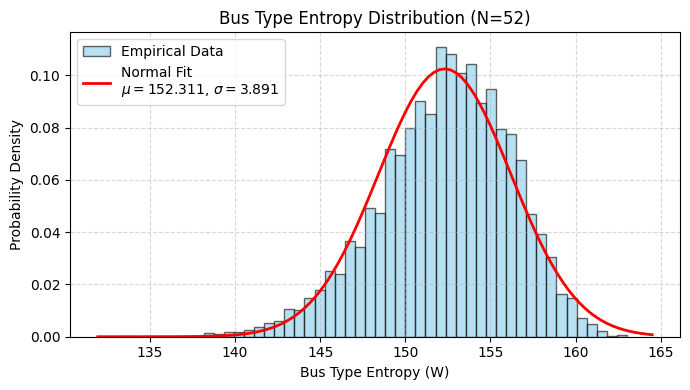

In [ ]:
allocator.plot_entropy_pdf(figsize=(7,4))

-----> Assignment Complete:
       Generators: 17 (32.7%)
       Loads:      21 (40.4%)
       Connectors: 14 (26.9%)

[5] Visualizing Bus Types & Edge Styles...
Calculating layout 'kamada_kawai' for bus types...


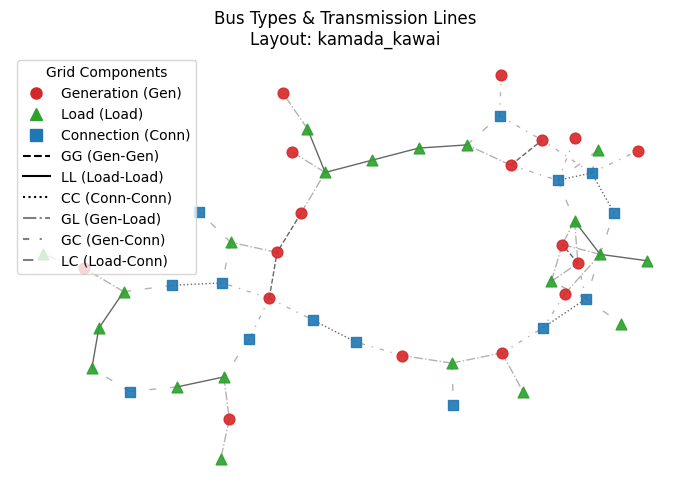

In [ ]:
# Assign bus types as graph node attributes
nx.set_node_attributes(grid_graph, bus_types, name="bus_type")
# Show stats
counts = Counter(bus_types.values())
total = sum(counts.values())
print(f"-----> Assignment Complete:")
print(f"       Generators: {counts['Gen']} ({counts['Gen']/total:.1%})")
print(f"       Loads:      {counts['Load']} ({counts['Load']/total:.1%})")
print(f"       Connectors: {counts['Conn']} ({counts['Conn']/total:.1%})")

# --- 5. Bus Type Visualization ---
print("\n[5] Visualizing Bus Types & Edge Styles...")

# Call the new interactive method
viz.plot_bus_types(
    grid_graph, 
    layout='kamada_kawai', 
    title="Bus Types & Transmission Lines", 
    figsize=(7,5)
)